In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv('/content/drive/MyDrive/MSIM/datasets/wine.csv')

In [10]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,0.0,0.0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,0.0,0.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,0.0,0.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,0.0,1.0


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Mark about 70% of the data for training and use the rest for testing
# Outcome variable: high_quality
# Predictors: density, sulphates, pH
X_train, X_test, y_train, y_test = train_test_split(df[['density','sulphates','pH']], df['high_quality'], test_size=0.3)

In [12]:
X_train

,density,sulphates,pH
4573,0.99540,0.52,3.06
1836,0.99720,0.50,3.27
3252,1.01030,0.38,3.15
2996,0.99860,0.46,3.04
4347,0.99035,0.90,3.38
...,...,...,...
5285,0.99438,0.50,3.09
2317,0.99330,0.71,3.49
4326,0.99092,0.46,3.06
5553,0.99910,0.51,3.14


In [13]:
# Define the classifier using kNN function and train it
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
# Test the classifier by giving it test instances
prediction = classifier.predict(X_test)

In [15]:
# Count how many were correctly classified
correct = np.where(prediction==y_test, 1, 0).sum()
print(correct)

1526


In [16]:
accuracy = correct/len(y_test)
print(accuracy)

0.7825641025641026


In [17]:
results = []

for k in range(1, 51, 2):
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(X_train,y_train)
  prediction = classifier.predict(X_test)
  correct = np.where(prediction==y_test, 1, 0).sum()
  accuracy = correct/len(y_test)
  print ("k=", k, " Accuracy=", accuracy)
  results.append([k,accuracy])

# Convert that series of tuples in a dataframe for easy plotting
results = pd.DataFrame(results, columns=["k","accuracy"])

k= 1  Accuracy= 0.7892307692307692
k= 3  Accuracy= 0.7825641025641026
k= 5  Accuracy= 0.7835897435897435
k= 7  Accuracy= 0.7866666666666666
k= 9  Accuracy= 0.7892307692307692
k= 11  Accuracy= 0.7897435897435897
k= 13  Accuracy= 0.7897435897435897
k= 15  Accuracy= 0.7923076923076923
k= 17  Accuracy= 0.7953846153846154
k= 19  Accuracy= 0.7907692307692308
k= 21  Accuracy= 0.7964102564102564
k= 23  Accuracy= 0.796923076923077
k= 25  Accuracy= 0.8015384615384615
k= 27  Accuracy= 0.7984615384615384
k= 29  Accuracy= 0.7994871794871795
k= 31  Accuracy= 0.7958974358974359
k= 33  Accuracy= 0.7984615384615384
k= 35  Accuracy= 0.7979487179487179
k= 37  Accuracy= 0.798974358974359
k= 39  Accuracy= 0.7979487179487179
k= 41  Accuracy= 0.7984615384615384
k= 43  Accuracy= 0.7984615384615384
k= 45  Accuracy= 0.7984615384615384
k= 47  Accuracy= 0.798974358974359
k= 49  Accuracy= 0.7984615384615384


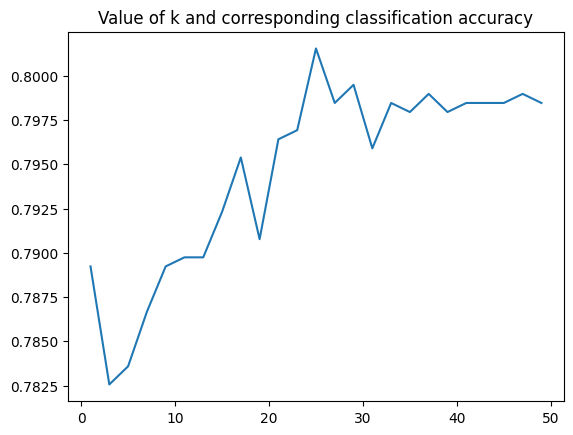

In [18]:
plt.plot(results.k, results.accuracy)
plt.title("Value of k and corresponding classification accuracy")
plt.show()